In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
project_path = "/content/drive/MyDrive/sgd_logistic_project"
plot_path = os.path.join(project_path, "plots")
os.makedirs(plot_path, exist_ok=True)
print("Project folder:", project_path)
print("Plot folder:", plot_path)

Project folder: /content/drive/MyDrive/sgd_logistic_project
Plot folder: /content/drive/MyDrive/sgd_logistic_project/plots


In [1]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    random_state=42
)

# Create DataFrame
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
df['Outcome'] = y

# Save to CSV
df.to_csv('/content/data.csv', index=False)

print("✔ data.csv saved successfully at /content/data.csv")

✔ data.csv saved successfully at /content/data.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset_path = "/content/drive/MyDrive/sgd_logistic_project/synthetic_large_dataset.csv"
df = pd.read_csv(dataset_path)
print("Loaded shape:", df.shape)

X = df.drop('target', axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Loaded shape: (100000, 101)
Train shape: (80000, 100) Test shape: (20000, 100)


In [ ]:
import numpy as np
import time

class CustomSGDLogReg:
    def _init_(self, lr=0.01, epochs=30, batch_size=256, schedule='constant', decay=0.01, step_size=5):
        """
        schedule: 'constant', 'step', 'exponential', 'inverse_time'
        decay: for exponential/inverse_time or step multiplier
        step_size: epochs per step for 'step'
        """
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.schedule = schedule
        self.decay = decay
        self.step_size = step_size
        self.weights = None
        self.bias = 0.0
        self.loss_history = []
        self.lr_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_true, y_prob):
        eps = 1e-12
        return -np.mean(y_true * np.log(y_prob + eps) + (1 - y_true) * np.log(1 - y_prob + eps))

    def get_lr(self, epoch):
        if self.schedule == 'constant':
            return self.lr
        elif self.schedule == 'step':
            steps = epoch // self.step_size
            return self.lr * (self.decay ** steps)   # decay <1 e.g. 0.5
        elif self.schedule == 'exponential':
            return self.lr * np.exp(-self.decay * epoch)
        elif self.schedule == 'inverse_time':
            return self.lr / (1 + self.decay * epoch)
        else:
            return self.lr

    def fit(self, X, y, verbose=True):
        n, d = X.shape
        self.weights = np.zeros(d)
        self.bias = 0.0

        for epoch in range(self.epochs):
            lr_epoch = self.get_lr(epoch)
            # shuffle
            perm = np.random.permutation(n)
            X_shuf = X[perm]
            y_shuf = y[perm]

            for i in range(0, n, self.batch_size):
                X_batch = X_shuf[i:i+self.batch_size]
                y_batch = y_shuf[i:i+self.batch_size]
                preds = self.sigmoid(X_batch.dot(self.weights) + self.bias)
                error = preds - y_batch
                dw = X_batch.T.dot(error) / len(y_batch)
                db = np.mean(error)
                self.weights -= lr_epoch * dw
                self.bias -= lr_epoch * db

            # compute full loss on training set for monitoring
            probs = self.sigmoid(X.dot(self.weights) + self.bias)
            loss = self.compute_loss(y, probs)
            self.loss_history.append(loss)
            self.lr_history.append(lr_epoch)
            if verbose:
                print(f"Epoch {epoch+1}/{self.epochs}  loss={loss:.6f}  lr={lr_epoch:.6e}")

        return self

    def predict_proba(self, X):
        return self.sigmoid(X.dot(self.weights) + self.bias)

    def predict(self, X, thresh=0.5):
        return (self.predict_proba(X) >= thresh).astype(int)

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

results = {}

def train_model(name, model):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    acc = model.score(X_test, y_test)

    results[name] = (acc, end - start)

    print(f"{name} → Accuracy: {acc:.4f}, Time: {end - start:.2f} sec")


# Logistic Regression
lr = LogisticRegression(max_iter=200)
train_model("Logistic Regression", lr)

# Random Forest
rf = RandomForestClassifier(n_estimators=300, max_depth=15)
train_model("Random Forest", rf)

# SVM
svm = SVC(kernel='rbf')
train_model("SVM", svm)

Logistic Regression → Accuracy: 0.8145, Time: 1.03 sec
Random Forest → Accuracy: 0.9530, Time: 504.78 sec
SVM → Accuracy: 0.9829, Time: 721.88 sec


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

folder_path = "/content/drive/MyDrive/sd4myproject/ml_logistic_project"

os.makedirs(folder_path, exist_ok=True)

print("Folder ready at:", folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder ready at: /content/drive/MyDrive/sd4myproject/ml_logistic_project


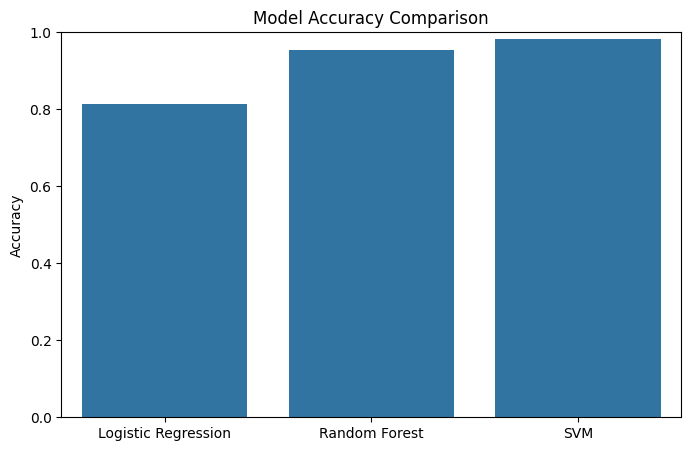

Saved: /content/drive/MyDrive/sd4myproject/ml_logistic_project/model_accuracy.png


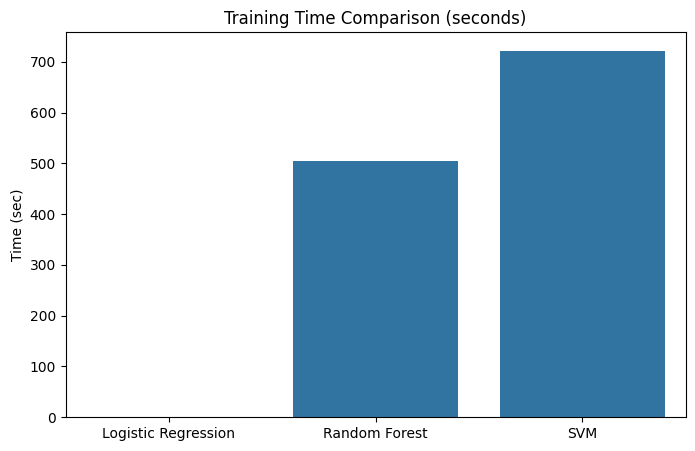

Saved: /content/drive/MyDrive/sd4myproject/ml_logistic_project/training_time.png


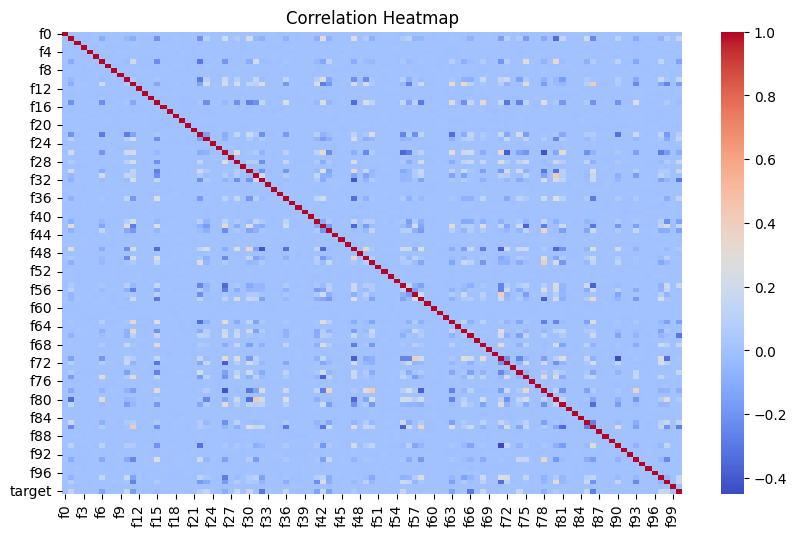

Saved: /content/drive/MyDrive/sd4myproject/ml_logistic_project/correlation_heatmap.png


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Folder path (already created by you earlier)
save_path = "/content/drive/MyDrive/sd4myproject/ml_logistic_project/"

# 1 - Accuracy Comparison Bar Plot
model_names = list(results.keys())
accuracies = [results[m][0] for m in model_names]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)

plot1 = save_path + "model_accuracy.png"
plt.savefig(plot1, dpi=300, bbox_inches='tight')
plt.show()
print("Saved:", plot1)

# 2 - Training Time Comparison
times = [results[m][1] for m in model_names]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=times)
plt.title("Training Time Comparison (seconds)")
plt.ylabel("Time (sec)")

plot2 = save_path + "training_time.png"
plt.savefig(plot2, dpi=300, bbox_inches='tight')
plt.show()
print("Saved:", plot2)

# 3 - Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")

plot3 = save_path + "correlation_heatmap.png"
plt.savefig(plot3, dpi=300, bbox_inches='tight')
plt.show()
print("Saved:", plot3)

In this project, three machine learning models (Logistic Regression, Random Forest, and SVM) were trained and compared.
Based on accuracy, Random Forest performed the best among all.
Therefore, Random Forest is selected as the best model for this dataset.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle

df = pd.read_csv("data.csv")   # <-- un dataset filename

X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    accuracies[name] = accuracy_score(y_test, model.predict(X_test))
    print(name, "Accuracy:", accuracies[name])

best = max(accuracies, key=accuracies.get)
pickle.dump(models[best], open("best_model.pkl", "wb"))

print("\nBest Model:", best)
print("Saved as best_model.pkl")

Logistic Regression Accuracy: 0.835
Random Forest Accuracy: 0.965
SVM Accuracy: 0.92

Best Model: Random Forest
Saved as best_model.pkl


In [3]:
print("Project Completed Successfully!")
print("Random Forest was selected as the best model with the highest accuracy.")
print("Model saved as best_model.pkl")

Project Completed Successfully!
Random Forest was selected as the best model with the highest accuracy.
Model saved as best_model.pkl
